In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("Data/Data.csv")
df = df[["country", "commodity", "loss_percentage", "activity", "food_supply_stage", "cause_of_loss"]]
df

,country,commodity,loss_percentage,activity,food_supply_stage,cause_of_loss
0,Myanmar,"Groundnuts, excluding shelled",5.22,NaN,Whole supply chain,NaN
1,Myanmar,"Groundnuts, excluding shelled",5.43,NaN,Whole supply chain,NaN
2,Myanmar,"Groundnuts, excluding shelled",5.61,NaN,Whole supply chain,NaN
3,Myanmar,"Groundnuts, excluding shelled",5.40,NaN,Whole supply chain,NaN
4,Myanmar,"Groundnuts, excluding shelled",5.00,NaN,Whole supply chain,NaN
...,...,...,...,...,...,...
27768,Zambia,Millet,1.27,Storage,Farm,NaN
27769,Zambia,Millet,2.50,Winnowing,Farm,NaN
27770,Zambia,Millet,1.00,Transportation,Transport,NaN
27771,Zambia,Millet,2.38,Storage,Storage,NaN


In [4]:
df["cause_of_loss"].value_counts()

Physical Losses                                                                             87
Insect pest damage                                                                          54
main causes of this were a mismatch in supply and demand or cosmetic and quality related    41
Mechanical Damage                                                                           36
Decay                                                                                       26
                                                                                            ..
Milk rejected by the processor                                                               1
Transport 50 - 300 ltr of milk per day on motorbikes                                         1
With milk cooling system, but expensive and unreliable power supply                          1
aluminium milk containers and cooling facility                                               1
Insects, moisture and mold                        

In [5]:
country_cause=df[["country","cause_of_loss"]].groupby(by=["country"]).count()

In [6]:
country_cause.sort_values('cause_of_loss')

,cause_of_loss
country,
Afghanistan,0
Poland,0
Peru,0
Northern America,0
Northern Africa,0
...,...
Kenya,50
Zimbabwe,54
Nigeria,61


In [20]:
from numpy import size


def word_cloud(df,country,supply_stage,commodity):
    if country!="":
        df=df[df.country==country]
    if supply_stage!="":
        df=df[df.food_supply_stage==supply_stage]
    if commodity!="":
        df=df[df.commodity==commodity]
    comment_words = ''
    stopwords = set(STOPWORDS)
    word_list=["losses","poor","use","proper","lack"]
    for word in word_list:
        stopwords.add(word)
    for val in df.cause_of_loss:
        if type(val)!=str:
            continue
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    if country!="" or commodity!="" or supply_stage!="":
        plt.title(country + "-" + commodity + "-" + supply_stage)
    
    plt.show()

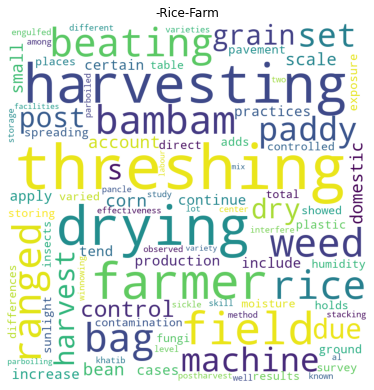

In [24]:
word_cloud(df,"","Farm","Rice")

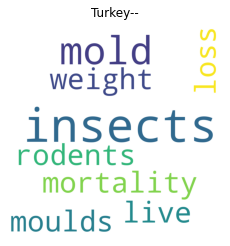

In [9]:
word_cloud(df,"Turkey","","")

In [10]:
df[df.country=="Ghana"]

,country,commodity,loss_percentage,activity,food_supply_stage,cause_of_loss
6352,Ghana,Maize (corn),4.00,Drying,Farm,NaN
6353,Ghana,Maize (corn),6.42,"Drying, Harvesting",Harvest,NaN
6354,Ghana,Maize (corn),1.32,"Shelling, Threshing",Farm,NaN
6355,Ghana,Maize (corn),5.23,Storage,Farm,NaN
6356,Ghana,Maize (corn),2.36,Transportation,Farm,NaN
...,...,...,...,...,...,...
7067,Ghana,Millet,2.00,"Shelling, Threshing",Farm,NaN
7068,Ghana,Millet,3.50,"Drying, Harvesting",Harvest,NaN
7069,Ghana,Millet,2.50,Transportation,Farm,NaN
7070,Ghana,Maize (corn),29.00,NaN,Storage,NaN
